In [4]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Algoritmos de previsão ML
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

#Divisão do dataset em treino e teste
from sklearn.model_selection import train_test_split, KFold

#Para normalizar o Fare
from sklearn.preprocessing import StandardScaler

#Avaliação do modelo
from sklearn.metrics import accuracy_score as acc

In [5]:
train = pd.read_csv('../titanic/train_eda.csv')
test = pd.read_csv('../titanic/test_eda.csv')

In [6]:
train.head()

,Survived,Pclass,Have_Cabin,Sozinho,Crianca,Meia_Idade,Idosos,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare,Fare_log
0,0,3,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,2.110213
1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,4.280593
2,1,3,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,2.188856
3,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,3.990834
4,0,3,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,2.202765


In [7]:
test.head()

,PassengerId,Pclass,Have_Cabin,Sozinho,Crianca,Meia_Idade,Idosos,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare,Fare_log
0,892,3,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,2.178064
1,893,3,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2.079442
2,894,2,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,2.369075
3,895,3,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,2.268252
4,896,3,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,2.586824


In [47]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
X_test.shape, X_train.shape

((268, 17), (623, 17))

In [11]:
X_train.head()

,Pclass,Have_Cabin,Sozinho,Crianca,Meia_Idade,Idosos,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare,Fare_log
857,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,3.316003
52,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,4.353231
386,3,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,3.869116
124,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,4.360388
578,3,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,2.738146


In [12]:
test.head()

,PassengerId,Pclass,Have_Cabin,Sozinho,Crianca,Meia_Idade,Idosos,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare,Fare_log
0,892,3,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,2.178064
1,893,3,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2.079442
2,894,2,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,2.369075
3,895,3,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,2.268252
4,896,3,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,2.586824


In [13]:
xgb = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)

In [14]:
lgbm.fit(X_train, y_train)
ylgbm = lgbm.predict(X_test)

acc(y_test, ylgbm)

0.832089552238806

In [18]:
clfs = [xgb, lgbm]

for clf in clfs:
    
    clf.fit(X_train, y_train)
    y = clf.predict(X_test)
    ytrain = clf.predict(X_train)
    
    print('-'*20)
    print(clf.__class__)
    print('Treino',acc(y_train,ytrain))
    print('Teste',acc(y_test,y))

--------------------
<class 'xgboost.sklearn.XGBClassifier'>
Treino 0.869983948635634
Teste 0.832089552238806
--------------------
<class 'lightgbm.sklearn.LGBMClassifier'>
Treino 0.8956661316211878
Teste 0.832089552238806


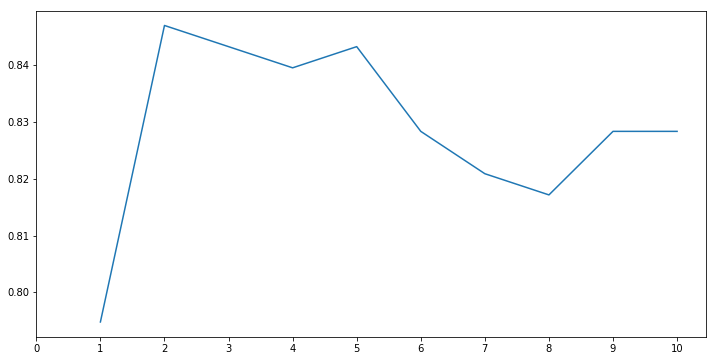

Accuracies for different values of n are: [ 0.79477612  0.84701493  0.84328358  0.83955224  0.84328358  0.82835821
  0.82089552  0.81716418  0.82835821  0.82835821] with the max value as  0.847014925373


In [17]:
a_index=list(range(1,11))
a=pd.Series()

x=[0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    
    model = XGBClassifier(max_depth=i) 
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    a = a.append(pd.Series(acc(y_test,prediction)))
    
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

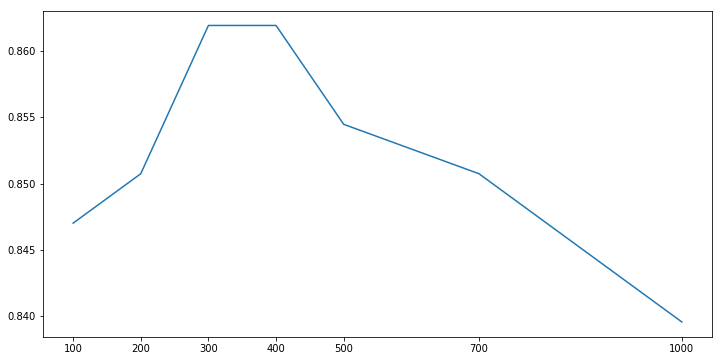

Accuracies for different values of n are: [ 0.84701493  0.85074627  0.8619403   0.8619403   0.85447761  0.85074627
  0.83955224] with the max value as  0.861940298507


In [18]:
a_index=list(range(1,8))
a=pd.Series()

x=[100,200,300,400,500,700,1000]

for i in x:
    model=XGBClassifier(max_depth=2, n_estimators=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(acc(y_test,prediction)))
plt.plot(x, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

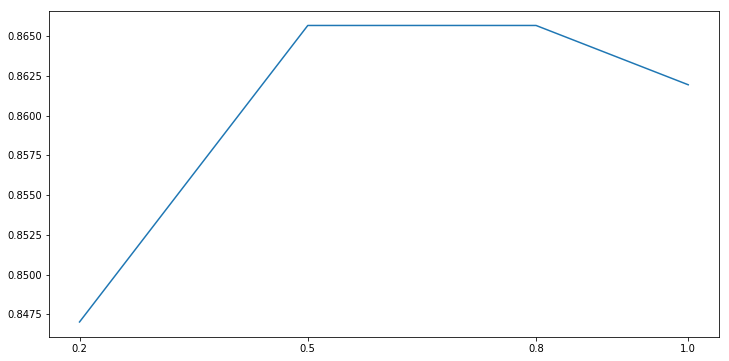

Accuracies for different values of n are: [ 0.84701493  0.86567164  0.86567164  0.8619403 ] with the max value as  0.865671641791


In [24]:
a_index=list(range(1,11))
a=pd.Series()

x=[0.2, 0.5, 0.8, 1]

for i in x:
    
    model = XGBClassifier(max_depth=2, subsample=i, n_estimators=300, learning_rate=0.1) 
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    a = a.append(pd.Series(acc(y_test,prediction)))
    
plt.plot(x, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [26]:
final_model = XGBClassifier(max_depth=2, subsample=0.8, n_estimators=300, learning_rate=0.1)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [27]:
Ids = test.PassengerId
preds = final_model.predict(test.drop(['PassengerId','Fare'], axis=1))

sub = pd.DataFrame()
sub['PassengerId'] = Ids
sub['Survived'] = preds

sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


Agora é só salvar o csv com as previsões e upar no kaggle

In [28]:
sub.to_csv('../titanic/subs.csv', index=False)

In [71]:
train.head()

,Survived,Pclass,Age,Fare,Have_Cabin,Sozinho,Crianca,Meia_Idade,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Miss,Titulo_Mr,Titulo_Mrs,Titulo_Rare,Fare_log
0,0,3,22.0,7.2500,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2.110213
1,1,1,38.0,71.2833,1,0,0,1,1,0,1,0,0,0,0,0,1,0,4.280593
2,1,3,26.0,7.9250,0,1,0,1,1,0,0,0,1,0,1,0,0,0,2.188856
3,1,1,35.0,53.1000,1,0,0,1,1,0,0,0,1,0,0,0,1,0,3.990834
4,0,3,35.0,8.0500,0,1,0,1,0,1,0,0,1,0,0,1,0,0,2.202765


In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [43]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)

In [44]:
lgbm = LGBMClassifier(objective='binary')

In [45]:
params = {
         'max_depth' : [2,3,4,5,6,7,8,-1],
         'n_estimators': [100,300,500,1000],
         'learning_rate': [0.1,0.01,0.3,0.03],
         'num_leaves': [31, 62, 124],
         'subsample': [1, 0.8]
                 }

In [48]:
grid_searcher = GridSearchCV(lgbm, scoring='accuracy', param_grid=params, cv=kf, verbose=1)

grid_searcher.fit(X,y)
parameters = grid_searcher.best_params_

print('Best score: {}'.format(grid_searcher.best_score_))
print('Best parameters: {}'.format(parameters))

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score: 0.8383838383838383
Best parameters: {'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 300, 'num_leaves': 31, 'subsample': 1}


[Parallel(n_jobs=1)]: Done 3840 out of 3840 | elapsed:  8.3min finished


In [50]:
model = LGBMClassifier(objective='binary', **parameters)

model.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               learning_rate=0.03, max_depth=7, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=300,
               n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1,
               subsample_for_bin=200000, subsample_freq=1)

In [52]:
Ids = test.PassengerId

output = model.predict(test.drop(['PassengerId'], axis=1))

sub = pd.DataFrame()
sub['PassengerId'] = Ids
sub['Survived'] = output

sub.to_csv('../titanic/subs_lgbm.csv', index=False)

In [42]:
xgb = XGBClassifier(random_state=0)